# LP4 final assignment

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Fill in your name(s) and group number in the cell below:

In [99]:
NAMES = "Carl Örnberg, Jonathan Nguyen"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "23"                # fill in your group number between the quotes

# Problem 1 (8 points)

We wish to build a gas pipeline from a gas Station to a small island. The island is H miles away from the closest shoreline point (point A in the figure below). Point A is L miles away from the processing station.
The cost of building the pipeline is different if it is on land versus underwater:
- cost under water: **C_ocean** million dollars/mile, 
- cost on land: **C_land** million dollars/mile. 

The gas pipeline will travel from the gas station until point B on land, and from point B towards the island underwater. 
We want to estimate the distance x (between point A and B) that minimizes the cost of building the gas pipeline. 

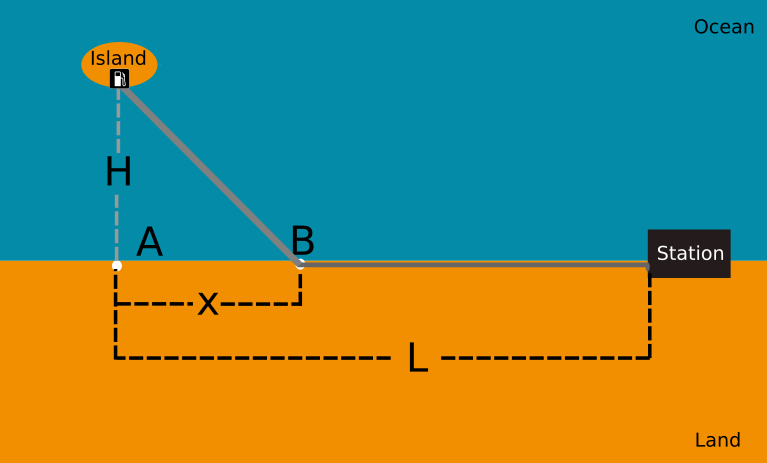

Write a function, 'my_pipe_builder' that allows you to determine the distance x that minimizes the total cost of the pipeline.
The function should have as input the following arguments: 
- **C_ocean**,
- **C_land**,
- **L**,
- **H**

and return `x_r`, within a tolerance of $1\times 10^{-6}$.

Verify that your code returns a value close to 28.867513 for C_ocean, C_land, L, H = 20, 10, 100, 50. 
Explain your thought process and solution via comments.

In [100]:
#YOUR CODE HERE
import numpy as np

def Newtons_method_P(guess, tol, P, P_prime):
        """Function that takes some guesses for roots and then approximates it with Newtons method
        Input - guess = guesse of root
          - tol = the tolerance of convergence
          - P - function
          - P_prime - derivative of function
        Return - aproximated root
        """
        
        x0 = guess
        x1 = x0 - P(x0)/P_prime(x0)
        while abs(P(x1))>tol:
            x0, x1 = x1, x0 - P(x0)/P_prime(x0)
        roots = x1
        return roots
    
    

def my_pipe_builder(C_ocean, C_land, L, H, Rootfunc = Newtons_method_P, tol_c=10**(-6)):
    # the mathematical function for cost is C_ocean*sqrt(x^2+H^2) + (L-x)*C_land
    # to maxize the soulution we need to differentiate and solve for cost_prime = 0, and check that the second derivative is negative
    
    def cost_prime(x):
        return C_ocean * x / np.sqrt(x**2 + H**2) - C_land
    def cost_prime_prime(x):
        return C_ocean * H**2 / (x**2 + H**2)**(3/2)

    guess_c = L/3 # Arbritary guess for the correct value
    xr = Newtons_method_P(guess_c, tol_c, cost_prime, cost_prime_prime)
    if cost_prime_prime(xr) > 0:
        return xr
    else:
        return None
    
x = my_pipe_builder(20, 10, 100, 50)
x
    

28.867513445742325

# Problem 2 (20 points)

## 2.a (5 points)

#### Derivation of the error of the trapezoid rule. 

The trapezoid rule allows one to write the integral of a function $f(x)$ from a to b as:

$$ \int _a^b f(x) dx = \sum_{i=0}^{n-2} \int_{x_i}^{x_{i+1}} f(x) dx \approx \sum_{i=0}^{n-2} c_i f(x_i), $$

where $c_i = h[\frac{1}{2},1,...,1,\frac{1}{2}]$. Having split up the interval $[a,b]$ into n-1 points, the step size satisfies: $h = x_{i+1} - x_i$, and $h = \frac{b-a}{n-1}$. 

**Using math typesetting in a markdown cell:**
* Show that the error of the trapezoid rule is:
$$e \sim O(h^3)f''(\xi) $$ for the integral in the interval $[x_i,x_i+h]$, where $\xi \in (x_i, x)$. 

* Then show that the error of the method for the full interval $[a,b]$ is $$ E \sim (b-a) O(h^2)f''(\xi). $$

Hints: Expand $f(x)$ around $x_i$ via the Taylor series, keeping terms up to second order as we did for our derivation of the error in the rectangle rule. Re-express the first derivative using the forward-difference approximation. Replace your expression for $f(x)$ in the integral and carry out the calculations.

#### *YOUR ANSWER HERE*

$$ f(x) = f(x_i) + f'(x_i)(x - x_i) + \frac{f''(\xi)(x - x_i)^2}{2} $$ 
$$ f(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{h}(x - x_i) + \frac{f''(\xi)(x - x_i)^2}{2} $$ 

$$ \int _{x_i}^{x_i +h} f(x) dx = \int _{x_i}^{x_i +h} f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{h}(x - x_i) + \frac{f''(\xi)(x - x_i)^2}{2} dx = \frac{f(x_{i+1}) + f(x_i)}{2} + \frac{f''(\xi) h^3}{6}  $$

$$  \int _{x_i}^{x_i +h} f(x) dx - \frac{f(x_{i+1}) + f(x_i)}{2} = \frac{f''(\xi) h^3}{6} = f''(\xi)O(h^3)   $$

## 2.b (15 points)

#### Check the dependence of the error of numerical integration methods on the step size $h$.

We saw that the error for different integration methods is $O(h^p)$, where $p$ took different values for the three different methods we discussed: Rectangle ($p = 1$), Trapezoid ($p = 2$), Simpson's ($p = 4$).

Complete the tasks below to determine what $p$ is numerically.

**Task 1** (1 point): Define a function $f(x)$ and interval $[a,b]$ for which you know exactly (analytically) the result of $\int_a^b f(x)dx$. Store the limits $a, b$ and the exact result of the integration in separate variables. You will use this to determine the error of the numerical integration methods below.

In [101]:
#YOUR CODE HERE
def f(x):
    return 2*x**4
a, b, integration_value = 0, 3, 18

**Task 2** (4 points): Define functions that perform the rectangle, trapezoid and Simpson's methods. Try to avoid loops and prefer numpy array operations to make the code faster. Remember that Simpson's rule requires an odd number of points.

In [102]:
#YOUR CODE HERE
def rectangle(f,a,b,n, left = True):
    xi = np.linspace(a, b, n) 
    h = xi[1]-xi[0]
    answer = np.sum(f(xi))*h
    return answer

def trapezoid(f,a,b,n, left = True):
    '''Integration via trapezoid rule
    
     Inputs:
            f =  function to integrate
            a, b = floats, limits of integration (not infinities)
            n = integer number of points. Should be odd, otherwise will raise assertion error.
        
        Returns:
            answer = float
    '''
    xi = np.linspace(a, b, n) 
    h = xi[1]-xi[0]
    answer = h* (np.sum(f(xi)) - f(xi[0])/2 - f(xi[n-1])/2)
    return answer


def Simpson(f,a,b,n):
    ''' Integrate the function f from a to b with n points.
    
        Inputs:
            f =  function to integrate
            a, b = floats, limits of integration (not infinities)
            n = integer number of points. Should be odd, otherwise will raise assertion error.
        
        Returns:
            answer = float
    '''
    # make sure n is odd
    assert n %2 !=0
    # number of intervals
    N = n-1
    # calculate the step size
    h=(b-a)/N
    
    s = f(a) + f(b)
    
    # first the odd terms
    for k in range(1,N,2):
        s += 4*f(a+k*h)
        
    # now the even terms
    for k in range(2,N,2):
        s += 2*f(a+k*h)
        
    # the answer is the sum*h/3
    answer=s*h/3
    return answer



**Task 3** (3 points): Define a function `check_error` that will check the error of a method for different values of step size. The output from this function should include an array of absolute errors `eta` found for different step sizes. You should be able to call the function with the name of the method you are checking. Remember the special requirement for Simpson's rule.

In [103]:
#YOUR CODE HERE
import numpy as np
def check_error(rule, f, n, N, a, b, integration_value):
    eta = []
    # Check if the rule is Simpson's rule
    if rule == Simpson:
        # Ensure n and N are odd (to have an even number of intervals)
        if n % 2 == 0 or N % 2 == 0:
            return None
        # Simpson's rule error computation
        for i in range(n, N+1, 2):
            eta.append(np.abs(rule(f, a, b, i) - integration_value))
    else:
        # Error computation for all other methods
        for i in range(n, N+1):
            eta.append(np.abs(rule(f, a, b, i) - integration_value))
    
    return np.array(eta)


**Task 4** (2 points): Run the function `check_error` for all three methods above. Vary the number of points used in the integration from $N=5$ to $N=10^4$. Recall that this corresponds to a step size $h = (b-a)/(N-1)$. Note that the calculations will take some time depending on your choice of interval and function.

In [104]:
#YOUR CODE HERE
error_rectangle = check_error(rectangle, f, 5, 10**4, a, b, integration_value)
error_trapezoid = check_error(trapezoid, f, 5, 10**4, a, b, integration_value)
error_Simpson = check_error(Simpson, f, 5, 10**4 +1, a, b, integration_value)


**Task 5** (2 points): Plot the values of the absolute error `eta` versus *decreasing* $h$ for all methods in the same figure. Given that the data you are plotting vary by orders of magnitude, choose a plot that allows you to see the full range of values clearly and use appropriate labels.

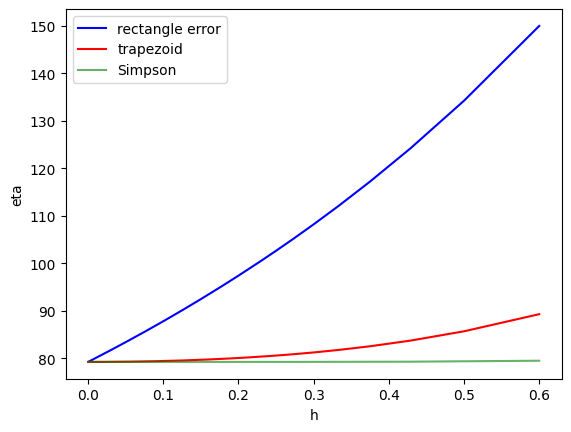

In [105]:
#YOUR CODE HERE
import matplotlib.pyplot as plt
h = [(b-a)/i for i in range(5,10**4+1)]
h_Simpson = [(b-a)/i for i in range(5,10**4+2, 2)]

plt.plot(h, error_rectangle, label="rectangle error", color="blue")
plt.plot(h, error_trapezoid, label = "trapezoid", color="red")
plt.plot(h_Simpson, error_Simpson, label="Simpson", color="green", alpha=0.6)
plt.xlabel("h")
plt.ylabel("eta")
plt.legend()



**Task 6** (3 points): Perform a fit to determine $p$ for each method. For some methods, you could be reaching the limit of numerical roundoff errors, so take that into account in your fit by removing the part of your solutions that is affected by roundoff errors. Comment on how your result compares with the expected values of $p$. Hint: you can use a simple linear fit if you transform the data accordingly.

In [106]:
#YOUR CODE HERE
import scipy as sc
import numpy as np

#Remove 0:s and log the data
log_error_rectangle = np.log(error_rectangle[error_rectangle != 0])
log_error_trapezoid = np.log(error_trapezoid[error_trapezoid != 0])
log_error_Simpson = np.log(error_Simpson[error_Simpson != 0])

#log the steps
h_1 = np.log(h)
h_Simpson_1 = np.log(h_Simpson)

p1 = np.polyfit(h_1,log_error_rectangle , 1)
p2 = np.polyfit(h_1, log_error_trapezoid, 1)
p3 = np.polyfit(h_Simpson_1, log_error_Simpson, 1)

print(f"P value for rectange is {p1[0]}")
print(f"P value for Trapezoid is {p2[0]}")
print(f"P value for Simpson is {p3[0]}")

#No idea were we went wrong. We think it has something to do with our chekc_error function but it seems fine. We got the wrong P-value but we 
#think its a minor mistake somewhere along the code


P value for rectange is 0.00700773757779865
P value for Trapezoid is 0.000336829334794209
P value for Simpson is 5.588727397173495e-06


# Problem 3 (12 points)

## 3.a (4 points)

Define your own function that implements the backward Euler method, as well as any other function you think is needed for backward Euler.

Hint: As we've seen in the lecture, the backward Euler method requires you to solve $y_{j+1} = y_j + hf(x_{j+1} , y_{j+1} )$, where $y_{j+1}$ is a root that must be found at each iteration (use any root-finding method you like).

In [107]:
#YOUR CODE HERE
import numpy as np
from scipy.optimize import fsolve

def backward_euler(f, a, b, n, yinit):
    '''Backward Euler

        Inputs: 
            f = function
            a, b = integration limits
            n = number of points
            yinit = intial y value

        Return:
            Array of y and x
    '''
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros(n).astype('float')
    ys[0] = yinit

    for i in range(1, n):
        def g(z):
            return z - ys[i-1] - h*f(xs[i], z)
        
        ys[i] = fsolve(g, ys[i-1])[0]

    return xs, np.array(ys)

## 3.b (2 points) 

Use your function from task 1 to solve the following ODE (known as the Riccati equation):
$$
y'(x) = -\frac{30}{1-x^2} + \frac{2x}{1-x^2}y(x) - y^2(x), \quad y(0.05) = 19.53
$$
for $x$ ranging from $0.05$ to $0.49$ with $n=12$ steps.

In [108]:
#YOUR CODE HERE
def f(x,y):
    return -30/(1-x**2) + 2*x/(1-x**2) * y - y**2

x, y = backward_euler(f, 0.05, 0.49, 12, 19.53)



## 3.c (2 points)

Solve the same equation with `solve_ivp` or `odeint` from `scipy`. Read the documentation of those methods to call them appropriately. Use a finer resolution for the x axis (more $x$ values between 0.5 and 0.49).


In [109]:
#YOUR CODE HERE
import scipy as sc

t_a_b = [0.05, 0.49]
t = np.arange(t_a_b[0],t_a_b[1], 0.001)
t_span = (t_a_b[0], t_a_b[1])
y0 = [19.53]
y_ivp = sc.integrate.solve_ivp(f,t_span, y0, t_eval=t).y


## 3.d (4 points) 

Make a plot to compare your solutions from 3b and 3c.

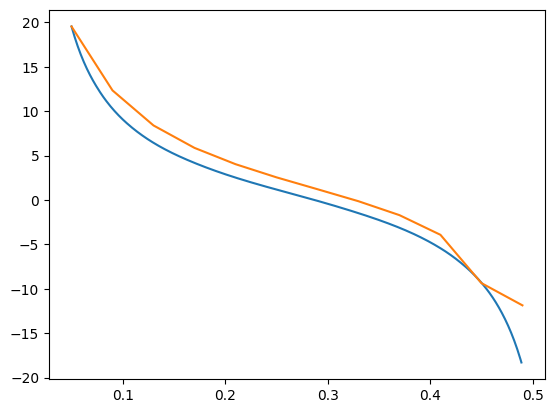

In [110]:
#YOUR CODE HERE

plt.plot(t, y_ivp[0])
plt.plot(x, y)


# Problem 4 (10 points)

Answer each of the following questions and explain your thought process in a few sentences. Write code or make a plot if it helps with your explanation.

## 4.a (2 points)

Would you choose to use the bisection or Newton-Raphson method to numerically find the root  of $y = -\frac{1}{1+(x-2)^2}+1$? Why?

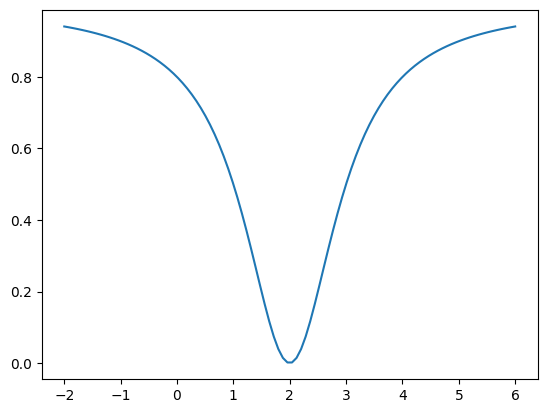

In [111]:
#YOUR ANSWER HERE
import matplotlib.pyplot as plt
def f(x):
    return 1 -1/(1 + (x-2)**2) 
x = np.linspace(-2, 6, 100)

plt.plot(x, f(x))

#The derivative at x = 2 is zero which will cause problems because it uses deriviative as a demoniator and divison by 0 is not possible.

## 4.b  (2 points)
Consider a scenario where you have a dataset with irregularly spaced points $x_i$ and corresponding values of a function at those points $y_i$, $i = 0, 1, ...n-1$. Explain which method(s) you could use to perform interpolation in such a case.

In [112]:
# YOUR ANSWER HERE

#Would either be Monomial or Langragian Polynomial because points are not evenly spaced.

## 4.c (2 points)
Write an example of an equation that you would choose to solve with an implicit method. Explain why.

In [113]:
# YOUR ANSWER HERE

#Different ODEs such as heat equation. Implicit methods are used when the next step is dependet on the current/next step.

## 4.d (4 points)
Write the main steps for an algorithm that solves a 4-dimensional integral using a numerical method taught in this course.

# YOUR ANSWER HERE

$\int _{x_i}^{x_i +h} f(x) \approx \frac{b-a}{N} \sum _i^N f(x_i) $
This follows for 4 dimensional integrals but the term before the sum will be equal to the 4 dimensional volume it spans. 
The algrothim follows that we divided by integration area into small portions and for each x_1, x_2, x_3, x_4 value, we add f(x_1, x_2, x_3, x_4) them all up in the summation. We then multiply the volume with the finalized sum

# Problem 5 (30 points)

Consider a projectile of mass m, moving in 2 dimensions. The direction along the x coordinate is horizontal and that along the y coordinate is vertical. The motion of the object will obey Newton's second law, i.e. $\vec{F} = m\vec{a}$, where the acceleration a is: $\vec{a} = \frac{d^2\vec{r}}{dt^2}$ and the position vector $r$ is $\vec{r} = x\hat{i} + y \hat{j}$ and $\hat{i}, \hat{j}$ are unit vectors along the x and y coordinates. The projectile is subject to gravity and also air resistance. The air resistance (a.k.a drag force) is opposite the direction of motion and can be expressed as: $$\rm \vec{F}_d = -km\vec{v}^2 \frac{\vec{v}}{|\vec{v}|}$$
where $\rm \vec{v}$ is the velocity vector.

Newton's second law results in a system of two second-order ordinary differential equations:
$$ \frac{d^2x}{dt^2} = -k \frac{dx}{dt} \sqrt{(\frac{dx}{dt})^2 + (\frac{dy}{dt})^2}$$
$$ \frac{d^2y}{dt^2} = -g -k \frac{dy}{dt} \sqrt{(\frac{dx}{dt})^2 + (\frac{dy}{dt})^2}$$
where $g$ is the gravitational acceleration ($9.81 \rm \, m/s^2$).

We will assume a value of $k = 1$.

## 5.a (3 points)

Numerical ODE solvers usually handle only first-order Ordinary Differential Equations (ODEs). Using math typesetting in a markdown cell, define a set of first-order ODEs that you will use to solve the above system.

#YOUR ANSWER HERE

$$\frac{dx}{dt} = v_x$$
$$ \frac{dv_x}{dt} = -k v_x \sqrt{v_x^2 + v_y^2}$$
$$\frac{dy}{dt} = v_y$$
$$ \frac{dv_y}{dt} = -g -k v_y \sqrt{v_x^2 + v_y^2}$$

## 5.b (2 points)

Define initial conditions that you need to solve the above system as an initial value problem. Express these in a markdown cell with math typesetting.

#YOUR ANSWER HERE
$$rx(0) = x_0 $$
$$r_y(0) = y_0 $$
$$v_x(0) = v_{x_0} $$
$$v_y(0) = v_{y_0} $$

## 5.c (12 points)

Use RK4 to solve the system of ODEs. You can use code from the lectures or a built-in method like scipy's `solve_ivp`.

Implement a criterion in your code to only keep the solution in a time interval that is physically meaningful (only until the projectile is just about to touch the ground). 

In [114]:
#YOUR CODE HERE
k = 1
g = 9.82
import scipy.integrate as sp
import matplotlib.pyplot as plt

def derivs(t, state):
    """Function that returns the derivatives from the differential equation of motion above
    Inputs - t - needed to make the solve_ivp function work
    state - the current value of the position and velocity (array)
    
    Outputs - derivative (array)
    """
    dydx = np.zeros_like(state) 

    dydx[0] = state[1]
    dydx[1] = -k * state[1] * np.sqrt(state[1]**2 + state[3]**2)
    dydx[2] = state[3]
    dydx[3] = -g - k * state[3] * np.sqrt(state[1]**2 + state[3]**2)
    return dydx

def event(t, y):
    return y[2]
event.terminal = True 

def differential_eq(derivs, tstop, dt, rx, vx, ry, vy):
    """Function that computes the specified differential equation and returns a soulution
    Inputs - derivs - computes the derivative according to the differential equation (function)
    tstop - a stop value for the time (float or int)
    dt - intervals of the time (float or int)
    rx, vx, ry, vy - starting conditions (float or int)
    
    """
    t = np.arange(0, tstop, dt) #If the simulation would last to tstop the position an velocity would be evaluatet at equally spaced points with width dt
    state = np.array([rx, vx, ry, vy])
    y = np.empty((len(t), len(state)))
    y[0] = state 

    y = sp.solve_ivp(derivs, t[[0, -1]], state, t_eval=t, events=event).y.T #events is used to stop the differential equation when the projectile hits the ground
    return y

## 5.d (5 points)

Find solutions for 3 different initial velocities (same initial position) and plot the three trajectories of the projectile in the same figure. A trajectory is the path of the projectile in the x-y plane. Add labels as needed.

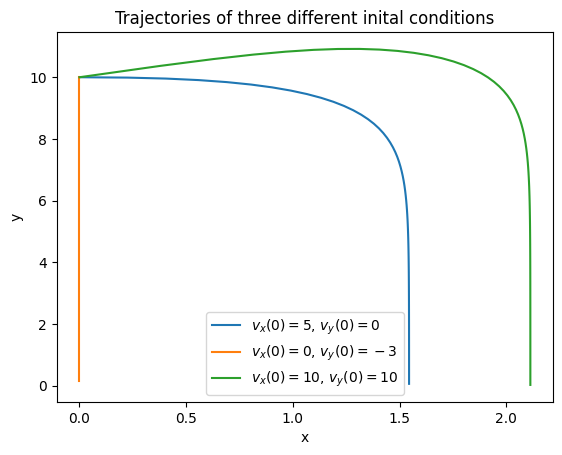

In [115]:
#YOUR CODE HERE
I_C = np.array([0, 5, 10, 0, 0, 0, 10, -3, 0, 10, 10, 10]).reshape(3, 4) #defining some starting conditions
tstop, dt = 10, 0.05

#simulates the differential equation for different starting values
y_1 = differential_eq(derivs, tstop, dt, I_C[0, 0], I_C[0, 1], I_C[0, 2], I_C[0, 3])
y_2 = differential_eq(derivs, tstop, dt, I_C[1, 0], I_C[1, 1], I_C[1, 2], I_C[1, 3])
y_3 = differential_eq(derivs, tstop, dt, I_C[2, 0], I_C[2, 1], I_C[2, 2], I_C[2, 3])

plt.title("Trajectories of three different inital conditions")

#plotting the data
plt.plot(y_1[:, 0], y_1[:, 2], label=r"$v_x(0) = 5$, $v_y(0)=0$")
plt.plot(y_2[:, 0], y_2[:, 2], label=r"$v_x(0) = 0$, $v_y(0)=-3$")
plt.plot(y_3[:, 0], y_3[:, 2], label=r"$v_x(0) = 10$, $v_y(0)=10$")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 5.e (8 points)

Make a multi-panel figure, that shows the x, and y coordinates of the velocity as a function of time, as well as the total velocity as a function of time, for all the 3 solutions you obtained above. Add labels as needed.

Comment on what happens to the trajectory and velocity at late times.

Text(0.5, 0.98, 'Multi-panel plot of component velocities and total velocities')

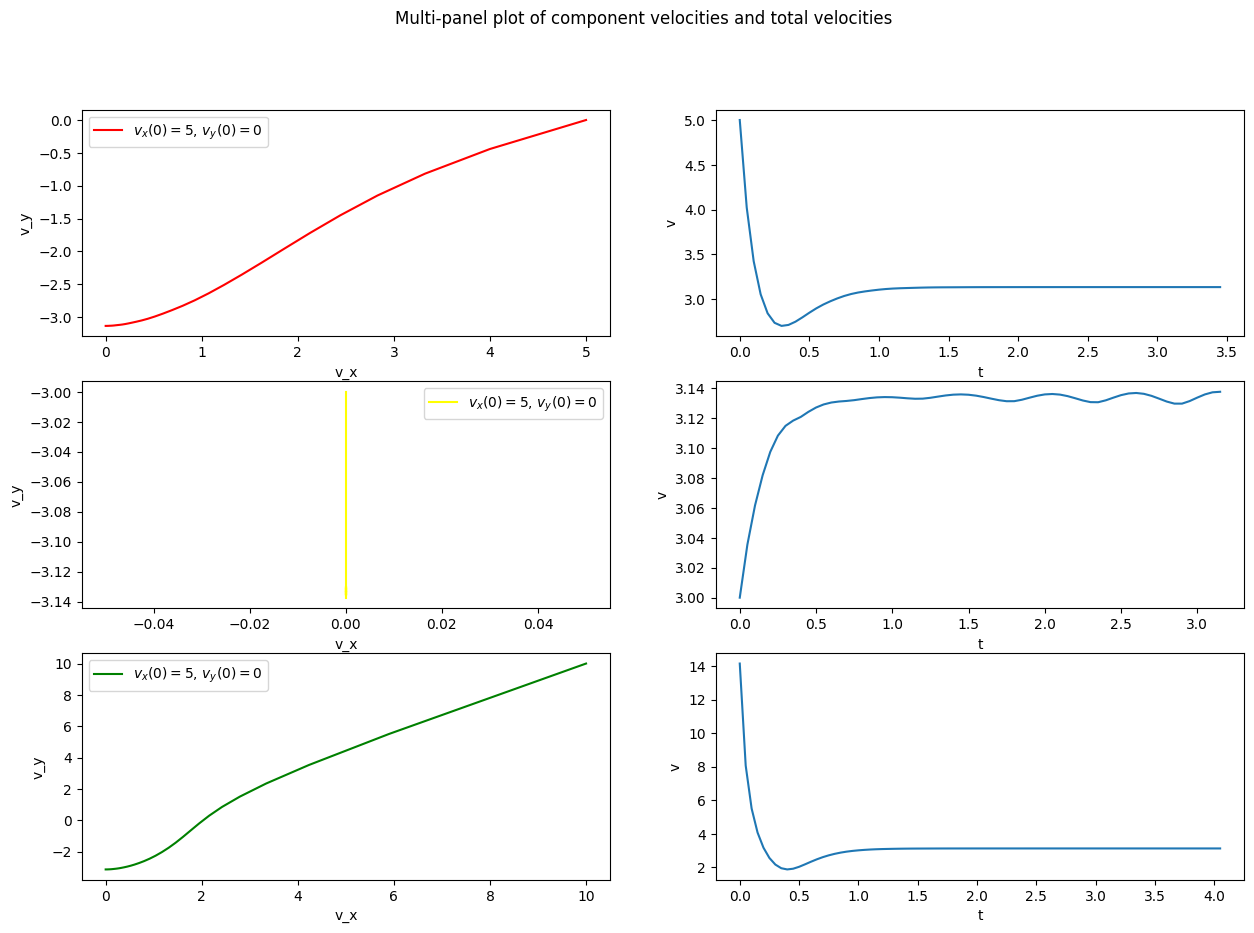

In [116]:
#YOUR CODE HERE
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
x1 = np.arange(0, len(y_1[:, 1])*dt, dt)
x2 = np.arange(0, len(y_2[:, 1])*dt, dt)
x3 = np.arange(0, len(y_3[:, 1])*dt, dt)

#plotting all of the data
ax[0,0].plot(y_1[:, 1], y_1[:, 3], label = r"$v_x(0) = 5$, $v_y(0) = 0$", color="red")
ax[0,1].plot(x1, np.sqrt(y_1[:, 1]**2 + y_1[:, 3]**2))
ax[0,0].set_xlabel(r"v_x")
ax[0,0].set_ylabel(r"v_y")
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("v")
ax[0,0].legend()

ax[1,0].plot(y_2[:, 1], y_2[:, 3], label = r"$v_x(0) = 5$, $v_y(0) = 0$", color = "yellow")
ax[1,1].plot(x2, np.sqrt(y_2[:, 1]**2 + y_2[:, 3]**2))
ax[1,0].set_xlabel(r"v_x")
ax[1,0].set_ylabel(r"v_y")
ax[1,1].set_xlabel("t")
ax[1,1].set_ylabel("v")
ax[1,0].legend()

ax[2,0].plot(y_3[:, 1], y_3[:, 3], label = r"$v_x(0) = 5$, $v_y(0) = 0$", color = "green")
ax[2,1].plot(x3, np.sqrt(y_3[:, 1]**2 + y_3[:, 3]**2))
ax[2,0].set_xlabel(r"v_x")
ax[2,0].set_ylabel(r"v_y")
ax[2,1].set_xlabel("t")
ax[2,1].set_ylabel("v")
ax[2,0].legend()

fig.suptitle("Multi-panel plot of component velocities and total velocities")

#The velocity approaches a "terminal velocity" which means that it is constant. This means that the gravitational force and the air 
#resistance force cancel out and therefore there is no net acceleration.

# Problem 6 (20 points)



One of the goals of the course is for you to be able to work on and make changes to code written by others. Check out the code at https://scipython.com/blog/chaotic-balls/

The code creates an animation of balls bouncing off a circular wall, solving the ODEs that correspond to free-falling motion under gravity. The balls move in 2-dimensions, with velocity $\rm \vec{v}$ that has components along the x and y coordinate: $\dot{x}, \dot{y}$ respectively. Complete the following tasks to identify an aspect of the code that can be improved.

## 6.a (2 points) 
Copy the code here and run it. Explain what the use of the keyword argument `events` in the call to `solve_ivp` achieves.

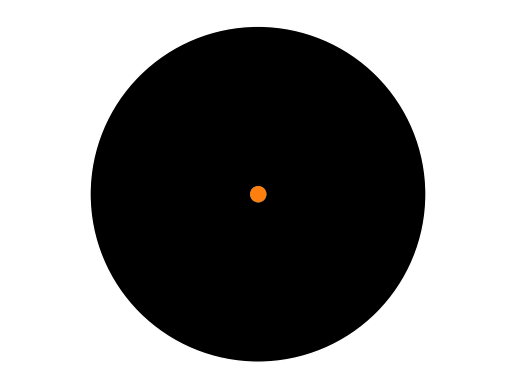

In [117]:
#YOUR CODE HERE
#YOUR CODE HERE
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Acceleration due to gravity, m.s-2 (downwards!).
g = 10
# Circle radius, m.
R = 1
# Time step, s.
dt = 0.001

def solve(u0):
    """Solve the equation of motion for a ball bouncing in a circle.

    u0 = [x0, vx0, y0, vy0] are the initial conditions (position and velocity).

    """

    # Initial time, final time, s.
    t0, tf = 0, 10

    def fun(t, u):
        """Return the derivatives of the dynamics variables packed into u."""
        x, xdot, y, ydot = u
        xddot = 0
        yddot = -g
        return xdot, xddot, ydot, yddot

    def event(t, u):
        """If the ball hits the wall of the circle, trigger the event."""
        return np.hypot(u[0], u[2]) - R*1.01
    # Make sure the event terminates the integration.
    event.terminal = True

    # Keep track of the ball's position in these lists.
    x, y = [], []
    while True:
        # Solve the equations until the ball hits the circular wall or until
        # the time tf.
        soln = solve_ivp(fun, (t0, tf), u0, events=event, dense_output=True)
        if soln.status == 1:
            # We hit the wall: save the path so far...
            tend = soln.t_events[0][0]
            nt = int(tend - t0 / dt) + 1
            tgrid = np.linspace(t0, tend, 100)
            sol = soln.sol(tgrid)
            x.append(sol[0])
            y.append(sol[2])

            # ...and restart the integration with the reflected velocities as
            # the initial conditions.
            u = soln.y[:, -1].copy()
            p = np.array((u[0], u[2]))
            p = p / np.linalg.norm(p)
            v = np.array((u[1], u[3]))
            v = v - 2 * (v @ p) * p
            u0 = p[0], v[0], p[1], v[1]
            t0 = soln.t[-1]
        else:
            # We're done up to tf (or, rather, the last bounce before tf).
            break
    # Concatenate all the paths between bounces together.
    return np.concatenate(x), np.concatenate(y)

# For the animation, set up the path lines and circle patches representing the
# balls.
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
# Make the circular wall a little bit bigger because the ball paths eat into it.
ax.add_patch(plt.Circle((0, 0), 1.02, fc='k', ec='w'))
ax.axis('equal')
ax.axis('off')

line0, = ax.plot([], [])
line1, = ax.plot([], [])

pos = []
u0 = [0.001, 0, 0, 0]
ball0 = ax.add_patch(plt.Circle((u0[0], u0[2]), 0.05, fc='tab:blue', ec='none'))
pos.append(solve(u0))

u0 = [0.0015, 0, 0, 0]
ball1 = ax.add_patch(plt.Circle((u0[0], u0[2]), 0.05, fc='tab:orange', ec='none'))
pos.append(solve(u0))

def init():
    """
    Initialization, because we're blitting and need references to the
    animated objects.
    """
    return line0, line1, ball0, ball1

def animate(i):
    """Draw frame i of the animation."""

    line0.set_data(pos[0][0][:i], pos[0][1][:i])
    ball0.set_center((pos[0][0][i], pos[0][1][i]))

    line1.set_data(pos[1][0][:i], pos[1][1][:i])
    ball1.set_center((pos[1][0][i], pos[1][1][i]))
    return line0, line1, ball0, ball1

interval, nframes = 1000 * dt, int(len(pos[0][0]))
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False,
                              init_func=init, interval=interval, blit=True)
plt.show()


# Events in solve_itp has the function of making the ball stops when it hits the wall and the new path is calculated.

## 6.b (6 points)
Change the code so that you can extract the two components of the velocity of a ball ($\dot{x}, \dot{y}$). Clearly mark your changes with comments.

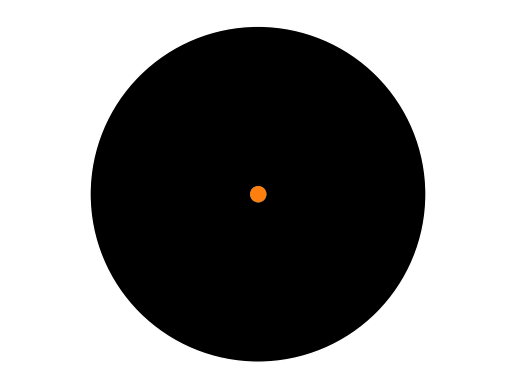

In [118]:
#YOUR CODE HERE
#YOUR CODE HERE
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Acceleration due to gravity, m.s-2 (downwards!).
g = 10
# Circle radius, m.
R = 1
# Time step, s.
dt = 0.001

def solve(u0):
    """Solve the equation of motion for a ball bouncing in a circle.

    u0 = [x0, vx0, y0, vy0] are the initial conditions (position and velocity).

    """

    # Initial time, final time, s.
    t0, tf = 0, 10

    def fun(t, u):
        """Return the derivatives of the dynamics variables packed into u."""
        x, xdot, y, ydot = u
        xddot = 0
        yddot = -g
        return xdot, xddot, ydot, yddot

    def event(t, u):
        """If the ball hits the wall of the circle, trigger the event."""
        return np.hypot(u[0], u[2]) - R*1.01
    # Make sure the event terminates the integration.
    event.terminal = True

    # Keep track of the ball's position in these lists.
    x, y = [], []
    x_dot, y_dot = [], []  # Our changes
   
    while True:
        # Solve the equations until the ball hits the circular wall or until
        # the time tf.
        soln = solve_ivp(fun, (t0, tf), u0, events=event, dense_output=True)
        if soln.status == 1:
            # We hit the wall: save the path so far...
            tend = soln.t_events[0][0]
            nt = int(tend - t0 / dt) + 1
            tgrid = np.linspace(t0, tend, 100)
            sol = soln.sol(tgrid)
            x.append(sol[0])
            y.append(sol[2])
            x_dot.append(sol[1]) # Our change
            y_dot.append(sol[3]) # Our change

            # ...and restart the integration with the reflected velocities as
            # the initial conditions.
            u = soln.y[:, -1].copy()
            p = np.array((u[0], u[2]))
            p = p / np.linalg.norm(p)
            v = np.array((u[1], u[3]))
            v = v - 2 * (v @ p) * p
            u0 = p[0], v[0], p[1], v[1]
            t0 = soln.t[-1]
        else:
            # We're done up to tf (or, rather, the last bounce before tf).
            break
    # Concatenate all the paths between bounces together.
    return np.concatenate(x), np.concatenate(y), np.concatenate(x_dot), np.concatenate(y_dot) # We added x_dot and y_dot

# For the animation, set up the path lines and circle patches representing the
# balls.
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
# Make the circular wall a little bit bigger because the ball paths eat into it.
ax.add_patch(plt.Circle((0, 0), 1.02, fc='k', ec='w'))
ax.axis('equal')
ax.axis('off')

line0, = ax.plot([], [])
line1, = ax.plot([], [])

pos = []
u0 = [0.001, 0, 0, 0]
ball0 = ax.add_patch(plt.Circle((u0[0], u0[2]), 0.05, fc='tab:blue', ec='none'))
pos.append(solve(u0))

u0 = [0.0015, 0, 0, 0]
ball1 = ax.add_patch(plt.Circle((u0[0], u0[2]), 0.05, fc='tab:orange', ec='none'))
pos.append(solve(u0))

def init():
    """
    Initialization, because we're blitting and need references to the
    animated objects.
    """
    return line0, line1, ball0, ball1

def animate(i):
    """Draw frame i of the animation."""

    line0.set_data(pos[0][0][:i], pos[0][1][:i])
    ball0.set_center((pos[0][0][i], pos[0][1][i]))

    line1.set_data(pos[1][0][:i], pos[1][1][:i])
    ball1.set_center((pos[1][0][i], pos[1][1][i]))
    return line0, line1, ball0, ball1

interval, nframes = 1000 * dt, int(len(pos[0][0]))
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False,
                              init_func=init, interval=interval, blit=True)
plt.show()

## 6.c (4 points)
Calculate the kinetic energy and potential energy of the first ball as a function of time. The kinetic and potential energies are given by: $\frac{1}{2} m (\dot{x}^2 + \dot{y}^2)$, $mg(R-y)$, respectively, where R is the radius of the circle and $y$ the vertical coordinate.

In [119]:
#YOUR CODE HERE
#YOUR CODE HERE
# Kinetic energy
u0 = []
y, xdot, ydot = pos[0][1], pos[0][2], pos[0][3]
m = 1
T = (1/2) * m * (xdot**2+ydot**2)
# Potential energy
V = m * g * (R - y)
E = T + V

## 6.d (4 points) 
Plot the total energy of the ball as a function of time. Is the energy conserved (constant with time)?


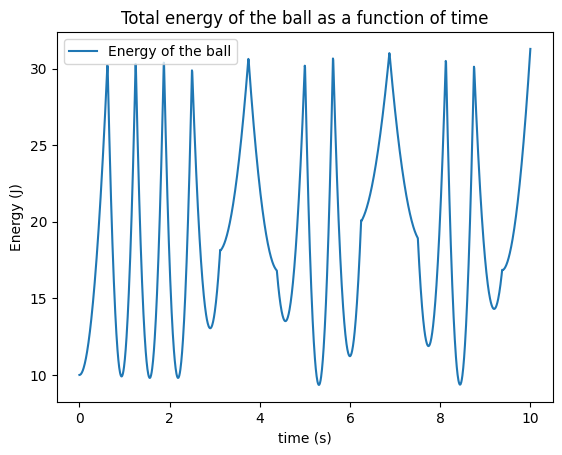

In [120]:
#YOUR CODE HERE
t0, tf = 0, 10 #from the function
t = np.linspace(t0, tf, len(E))
plt.plot(t, E,label='Energy of the ball')
plt.title('Total energy of the ball as a function of time')
plt.xlabel('time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

## 6.e (4 points) 
Explain what you think may be happening to the energy of the system, you can make a plot of your choice if it helps. Comment on where in the code the behavior may be coming from. Explain a modification you can make to fix the issue.

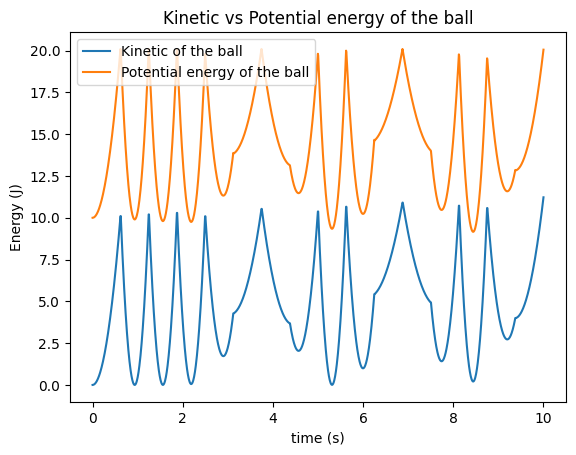

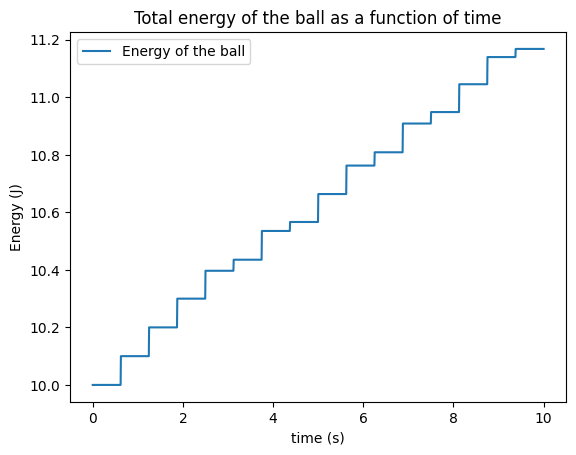

In [121]:
#YOUR CODE HERE
#YOUR CODE HERE
plt.title('Kinetic vs Potential energy of the ball')
plt.xlabel('time (s)')
plt.ylabel('Energy (J)')
plt.plot(t, T,label='Kinetic of the ball')
plt.plot(t, V,label='Potential energy of the ball')
plt.legend()
plt.show()

# The energy should be preserved but the formula for potential energy is wrong it should be m*g*y since the potential increases with y. Now we get a plot were the enery is constant for some time but then increases. This is because numerical errors when the revers trajectory is calculated. To prevent this a criteria that checks that the kinetic energy still is the same and scales the velocity vector by that amount.

# Modified potential energy
V_modified = m * g * (R + y)
E_modified = T + V_modified

plt.plot(t, E_modified,label='Energy of the ball')
plt.title('Total energy of the ball as a function of time')
plt.xlabel('time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

In [122]:
# You have reached the end!! 

#   _   _    _   _    ____      ____       _      __   __  _    
#   _   _    _   _    ____      ____        _      __   __  _    
#  |'| |'|U |"|u| |U |  _"\ uU |  _"\ u U  /"\  u  \ \ / /U|"|u  
# /| |_| |\\| |\| | \| |_) |/ \| |_) |/  \/ _ \/    \ V / \| |/  
# U|  _  |u | |_| |  |  _ <    |  _ <    / ___ \   U_|"|_u |_|   
#  |_| |_| <<\___/   |_| \_\   |_| \_\  /_/   \_\    |_|   (_)   
#  //   \\(__) )(    //   \\_  //   \\_  \\    >>.-,//|(_  |||_  
# (_") ("_)   (__)  (__)  (__)(__)  (__)(__)  (__)\_) (__)(__)_) 